# Определение перспективного тарифа для телеком компании

Задача: выяснить, какой из двух тарифов приносит больше денег.

Сначала загрузим все необходимые библиотеки и датасеты.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv', sep=',')
df_internet = pd.read_csv('/datasets/internet.csv', sep=',')
df_messages = pd.read_csv('/datasets/messages.csv', sep=',')
df_tariffs = pd.read_csv('/datasets/tariffs.csv', sep=',')
df_users = pd.read_csv('/datasets/users.csv', sep=',')

## Предобработка данных.

Изучим датасеты.

In [3]:
df_calls.info()
df_calls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [4]:
df_internet.info()
df_internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [5]:
df_messages.info()
df_messages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [6]:
df_tariffs
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [7]:
df_users.info()
df_users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


## Подготовка данных

Перед нами стоит задача посчитать для каждого пользователя:
1. количество сделанных звонков и израсходованных минут разговора по месяцам;
2. количество отправленных сообщений по месяцам;
3. объем израсходованного интернет-трафика по месяцам;
4. помесячную выручку с каждого пользователя (вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану).

В каждом датасете нам нужно произвести рассчёты по месяцам. Чтобы каждый раз не прописывать одно и то же, создадим для каждого датасета функцию, которая будет (а) применять ко всем столбцам с датами метод pd.to_datetime, чтобы мы смогли (б) создать посредством метода dt.month отдельный столбец с месяцем, после чего (в) пропишем метод pivot_table с индексом сразу по двум столбцам user_id и month, а значения и функцию будем прописывать для каждого датасета отдельно (значения всех пропусков установим как 0) и (г) отдельно пропишем функцию reset_index() для удобства работы.

In [8]:
def pivot_df(df, datetime, month, values, aggfunc):
    df[datetime] = df[datetime].apply(pd.to_datetime)
    df['month'] = df[datetime].dt.month
    pivot = df.pivot_table(index=['user_id', 'month'], values=values, aggfunc=aggfunc, fill_value=0)
    return pivot

Применим функцию для решения первой задачи: количество сделанных звонков и израсходованных минут разговора по месяцам. Поскольку aggfunc по умолчанию считает среднее, применим метод sum. Переименуем duration в более понятное calls_duration.

In [9]:
df_calls_pivot = pivot_df(df_calls, 'call_date', 'user_id' ,'duration', 'sum')
df_calls_pivot.rename(columns={'duration': 'calls_duration'}, inplace = True)
df_calls_pivot['calls_duration'] = df_calls_pivot['calls_duration'].round()
df_calls_pivot

calls_duration
user_id month                
1000    5               150.0
        6               159.0
        7               319.0
        8               390.0
        9               440.0
...                       ...
1498    10              233.0
1499    9                65.0
        10              430.0
        11              576.0
        12              465.0

[3174 rows x 1 columns]

Посчитаем количество отправленных сообщений по месяцам, применим метод count дадим столбцу id более логичное название.

In [10]:
df_messages_pivot = pivot_df(df_messages, 'message_date', 'user_id', 'id', 'count')
df_messages_pivot.rename(columns={'id': 'message_count'}, inplace = True)
df_messages_pivot

message_count
user_id month               
1000    5                 22
        6                 60
        7                 75
        8                 81
        9                 57
...                      ...
1498    10                42
1499    9                 11
        10                48
        11                59
        12                66

[2717 rows x 1 columns]

Посчитаем объем израсходованного интернет-трафика по месяцам. Применим метод sum. Округлим значение столбца mb_used.

In [11]:
df_internet_pivot = pivot_df(df_internet, 'session_date', 'user_id', 'mb_used', 'sum')
df_internet_pivot['mb_used'] = df_internet_pivot['mb_used'].round()
df_internet_pivot

mb_used
user_id month         
1000    5       2253.0
        6      23234.0
        7      14004.0
        8      14056.0
        9      14569.0
...                ...
1498    10     20579.0
1499    9       1846.0
        10     17789.0
        11     17963.0
        12     13056.0

[3203 rows x 1 columns]

Объединим все три сводные таблицы. 

In [12]:
df_total = df_calls_pivot.join(df_messages_pivot, how='outer')
df_total = df_total.join(df_internet_pivot, how='outer')
df_total = df_total.reset_index()

Присовокупим далее у общей таблице два столбца из df_users. Параметр how оставим по умолчанию, т.к. если сделаем outer, то в таблице появится две строки, в которых единственная информация будет о тарифе, остальные столбы пусты. Очевидно, это неинформативные данные, которыми легко можно пожертвовать без ущерба для исследования.

In [13]:
df_total = df_total.merge(df_users[['user_id', 'tariff', 'city']])

Переименуем столбец с названием тарифа и снова склеим таблицы.

In [14]:
df_tariffs.rename(columns={'tariff_name': 'tariff'}, inplace = True)
df_total = df_total.merge(df_tariffs, how='outer')

Прежде чем перейти к вычислениям, избавимся от пропусков. Заменим все пропуски на 0. Вполне вероятно, что некоторые люди вообще не писали смс, вообще не расходовали трафик звонков и не пользовались интернетом.

In [15]:
df_total.isna().sum()
df_total = df_total.fillna(0)

Переведём значения столбца message_count на целочисленные.

In [16]:
df_total['message_count'] = df_total['message_count'].astype(int)

Теперь посчитаем помесячную выручку с каждого пользователя. Для этого сначала вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, затем остаток умножим на значение из тарифного плана. Абонентскую плату прибавим чуть позже.

Особое внимание, что при вычислениях данных об интернете результат сделаем в гигабайтах (для удобства, т.к. в мегабайтах слишком большие числа). Поэтому разность использованных мегебайт и включённых в тариф разделим на 1024, чтобы тем самым перевести их в гигабайты.

In [17]:
df_total['month_profit_calls'] = (df_total['calls_duration'] - df_total['minutes_included']) * \
df_total['rub_per_minute']

df_total['month_profit_messages'] = (df_total['message_count'] - df_total['messages_included']) * \
df_total['rub_per_message']

df_total['month_profit_gb'] = ((df_total['mb_used'] - df_total['mb_per_month_included']) / 1024) * \
df_total['rub_per_gb']

Посчитаем теперь суммарную прибыль. Однако просто сложить значения трёх столбцов нельзя. Нам ведь важно посчитать прибыль, а прибыль - это всё, что клиент заплатил сверх абонентской платы. Все отрицательные значения в нашем случае - это не то, что компания потеряла, а то, что она как-бы недозаработала. Иными словами, все отрицательные значения - это недорасход пользователем купленного им пакета услуг. Поэтому все отрицательные значения нужно приравнять к нулю (ведь ноль означает, что клиент не вышел за пределы пакета и не заплатил сверх него). И только после мы можем считать общую сумму. Напишем цикл, который перебирает столбцы с итоговыми суммами и приравнивает к нулю те значения, которые меньше или равны нулю, а значения больше нуля оставляет как есть.

In [18]:
for i in ['month_profit_calls', 'month_profit_messages', 'month_profit_gb']:
    df_total.loc[df_total[i] > 0, i] = df_total[i]
    df_total.loc[df_total[i] <= 0, i] = 0

Теперь посчитаем итоговую сумму с учётом абонентской платы.

In [19]:
df_total['month_profit_total'] = df_total['month_profit_calls'] + df_total['month_profit_messages'] + df_total['month_profit_gb'] + \
df_total['rub_monthly_fee']

Посмотрим, что в итоге получилось:

In [20]:
df_total

,user_id,month,calls_duration,message_count,mb_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month_profit_calls,month_profit_messages,month_profit_gb,month_profit_total
0,1000,5,150.0,22,2253.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0,0.000000,1950.000000
1,1000,6,159.0,60,23234.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0,0.000000,1950.000000
2,1000,7,319.0,75,14004.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0,0.000000,1950.000000
3,1000,8,390.0,81,14056.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0,0.000000,1950.000000
4,1000,9,440.0,57,14569.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0,0.000000,1950.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,233.0,42,20579.0,smart,Владикавказ,50,15360,500,550,200,3,3,0.0,0,1019.335938,1569.335938
3210,1499,9,65.0,11,1846.0,smart,Пермь,50,15360,500,550,200,3,3,0.0,0,0.000000,550.000000
3211,1499,10,430.0,48,17789.0,smart,Пермь,50,15360,500,550,200,3,3,0.0,0,474.414062,1024.414062
3212,1499,11,576.0,59,17963.0,smart,Пермь,50,15360,500,550,200,3,3,228.0,27,508.398438,1313.398438


## Анализ данных.

Задача: описать поведение клиентов оператора, исходя из выборки. Выяснить, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитать среднее количество, дисперсию и стандартное отклонение.

Выборку сделаем по столбцу tariff. Создадим три сводные таблицы, чтобы узнать кол-во сообщений, минут разговора и объём трафика. 

In [21]:
df_total.pivot_table(index='tariff', values='calls_duration', aggfunc=['mean', 'var', 'std']).apply(np.ceil).reset_index()

,tariff,mean,var,std
,,calls_duration,calls_duration,calls_duration
0,smart,395.0,32387.0,180.0
1,ultra,498.0,89949.0,300.0


Пользователи тарифа smart ежемесячно тратят в среднем 395 минут; дисперсия составляет 32 387 минут в квадрате, а стандартное отклонение - 180 минут. 
Пользователи тарифа ultra ежемесячно тратят в среднем 498 минут; дисперсия составляет 89 943 минут в квадрате, а стандартное отклонение - 300 минут.

Это говорит о том, что пользователи тарифа ultra расходуют больше минут, чем пользователи тарифа smart. Об этом говорит как среднее кол-во минут, так и стандартное отклонение в обоих тарифах. Вывод простой: пользователи тарифа ultra разговаривают больше пользователей smart.

In [22]:
df_total.pivot_table(index='tariff', values='message_count', aggfunc=['mean', 'var', 'std']).apply(np.ceil).reset_index()

,tariff,mean,var,std
,,message_count,message_count,message_count
0,smart,34.0,797.0,29.0
1,ultra,50.0,2286.0,48.0


Пользователи тарифа smart ежемесячно отправляют в среднем 34 сообщения; дисперсия составляет 797, а стандартное отклонение - 29 сообщений. 
Пользователи тарифа ultra ежемесячно отправляют в среднем 50 сообщений; дисперсия составляет 2 286, а стандартное отклонение - 48 сообщений. 

Вывод тот же, что в исследовании о минутах: пользователи тарифа ultra переписываются больше пользователей smart.

In [23]:
df_total.pivot_table(index='tariff', values='mb_used', aggfunc=['mean', 'var', 'std']).apply(np.ceil).reset_index()

,tariff,mean,var,std
,,mb_used,mb_used,mb_used
0,smart,16209.0,34462494.0,5871.0
1,ultra,19469.0,101751062.0,10088.0


 Пользователи тарифа smart ежемесячно расходуют в среднем 16 209 мегабайт; дисперсия составляет 34 462 497, а стандартное отклонение - 5 871 мегабайт.
Пользователи тарифа ultra ежемесячно расходуют в среднем 16 209 мегабайт; дисперсия составляет 101 751 014, а стандартное отклонение - 10 088 мегабайт.

И вновь тот же вывод: пользователи тарифа ultra расходуют больше мегабайт, нежели пользователи smart. Думается, что такие результаты закономерны: те, кто знает, что много звонят, переписываются и сидят в интернете, выбирают тариф с большим пакетом услуг.

Построим гистаграммы. Задействуем функции из предыдущего проекта, которые автоматически определяют кол-во корзин, устаналивают квантили, отмечают медианы и средние значения, а также дают названия гистаграммам. Создадим два датасета со срезами данных по тарифам, затем применим к ним функции.


In [24]:
def value_bins(df, value):
    if df[value].max() > 100:
        return 50
    elif df[value].max() > 500:
        return 100
    elif df[value].max() > 1000:
        return 200
    else:
        return 20
def histogr(df, column):
    quant = df.loc[(df[column] >= df[column].quantile(.05)) & (
    df[column] <= df[column].quantile(.95)), column]
    hist = quant.plot(kind='hist', bins=value_bins(df, column))
    plt.axvline(x=quant.median(), linewidth=3, color='red', linestyle='--')
    plt.axvline(x=quant.mean(), linewidth=3, color='black', linestyle='--')
    plt.axvline(x=quant.quantile(.05), linewidth=3, color='y', linestyle='--')
    plt.axvline(x=quant.quantile(.95), linewidth=3, color='y', linestyle='--')
    plt.title('Распределение по столбцу ' + column)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid()
    plt.show()
    quant.plot(kind='kde', alpha=0.5)
    plt.xlim(df[column].quantile(.01), df[column].quantile(.99))
    plt.axvline(x=quant.median(), linewidth=3, color='red', linestyle='--')
    plt.axvline(x=quant.mean(), linewidth=3, color='black', linestyle='--')
    plt.axvline(x=quant.quantile(.05), linewidth=3, color='y', linestyle='--')
    plt.axvline(x=quant.quantile(.95), linewidth=3, color='y', linestyle='--')
    plt.title('Распределение по столбцу ' + column)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid()
    plt.show()

In [25]:
ultra = df_total.query('tariff == "ultra"')
smart = df_total.query('tariff == "smart"')

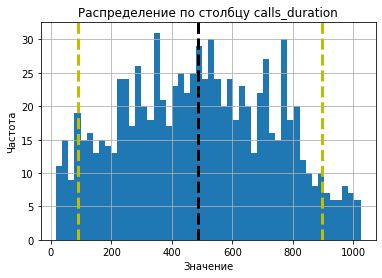

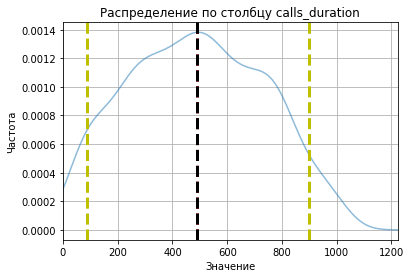

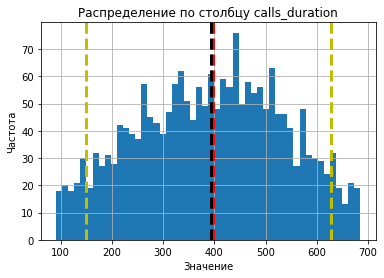

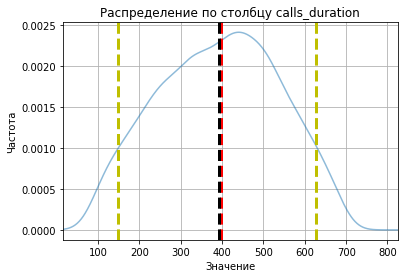

In [26]:
histogr(ultra, 'calls_duration')
histogr(smart, 'calls_duration')

В обоих случаях медиана и среднее (почти) совпадают. В гистограмме для тарифа ultra мы видим более-менее нормальное распределение. Гистограмма для smart немного смещена вправо. Но в целом мы видим более или менее колоколообразный график.

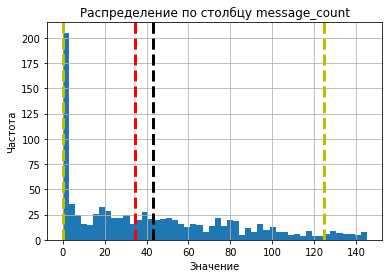

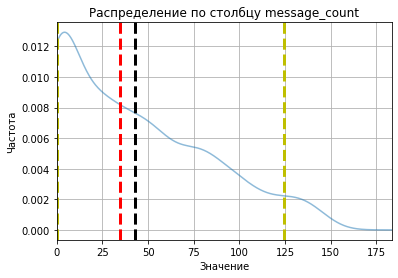

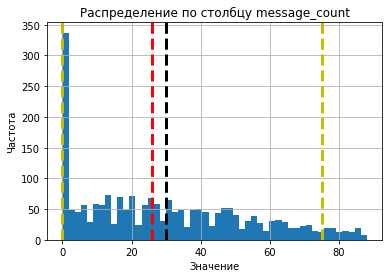

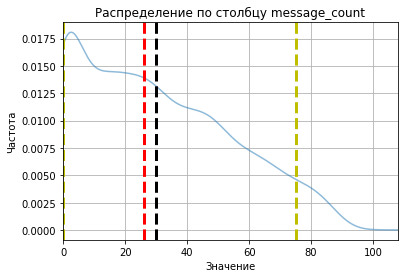

In [27]:
histogr(ultra, 'message_count')
histogr(smart, 'message_count')

График ощутимо смещён вправо, и это не только из-за большого количества нулей. Видно, что и средняя, и медиана смещены влево. Думается, что в этом нет ничего необычного: смс после появления мессенджеров всё менее востребованы, и чем больше цифра отправки сообщений, тем реже она встречается.

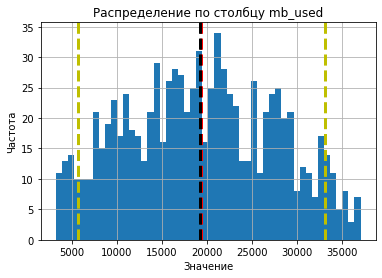

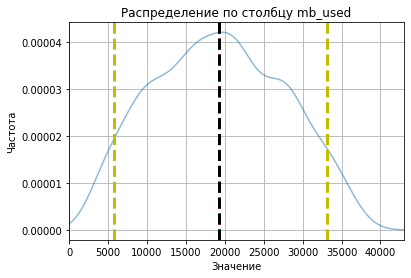

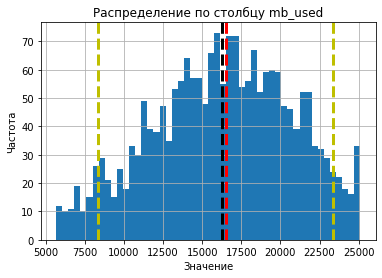

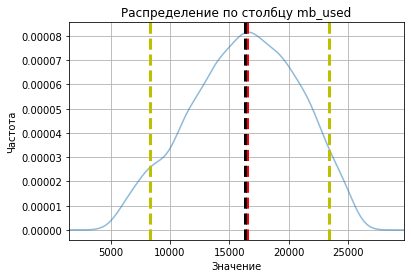

In [28]:
histogr(ultra, 'mb_used')
histogr(smart, 'mb_used')

И снова мы видим колоколообразный график, говорящий о том, что распределение более-менее нормальное. 

## Проверка гипотез.

На этом этапе мы должны проверить следующие две гипотезы:
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Начнём с первой. Сформулируем следующим образом:
- Н0: Средняя выручка пользователей тарифа ultra равна средней выручке пользователей тарифа smart.
- Н1: Средняя выручка пользователей тарифа ultra не равна средней выручке пользователей тарифа smart.

Для проверки гипотез используем тест Стьюдента. Значение alpha установим как 0.05, а сам тест проведём при помощи ttest_ind, т.к. у нас, очевидно, две независимые выборки. Параметр equal_var использовать не будем, поскольку у нас довольно большой массив данных.

In [29]:
np.var(smart['month_profit_total'])

588968.4406012663

In [30]:
np.var(ultra['month_profit_total'])

125813.60649240206

In [31]:
alpha = 0.05
results = st.ttest_ind(smart['month_profit_total'], ultra['month_profit_total'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.1039551141946012e-213
Отвергаем нулевую гипотезу


Тест показал, что нулевая гипотеза неверна. Это говорит о том, что средняя выручка пользователей тарифов различна. Посмотрим, у кого она больше.

In [32]:
if smart['month_profit_total'].mean() > ultra['month_profit_total'].mean():
    print('Средняя выручка пользователей тарифа smart выше')
else:
    print('Средняя выручка пользователей тарифа ultra выше')

Средняя выручка пользователей тарифа ultra выше


In [33]:
smart['month_profit_total'].mean()

1197.63180658367

In [34]:
ultra['month_profit_total'].mean()

2059.8690811389592

Из полученных вычислений можно сделать вывод, что обладатели тарифы smart в среднем переплачивают за доп. услуги более половины стоимости тарифа, в то время как пользователи тарифа ultra в среднем платят сверх абонентской платы чуть более 100 руб. Тем не менее, тариф ultra - более выгодный для компании, ибо хотя средняя переплата небольшая, общая абонентская плата выше платы за тариф smart. 

Исследуем, как выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Для этого создадим два датафрейма: один со срезом данных по Москве, другой - для всех остальных населённых пунктов.

In [35]:
moscow = df_total.query('city == "Москва"')
other = df_total.query('city != "Москва"')

Сформулируем гипотезы:

- Н0: выручка пользователей из Москвы равна выручке пользователей из других населённых пунктов.
- Н1: выручка пользователей из Москвы не равна выручке пользователей из других населённых пунктов.

In [36]:
alpha = 0.05
results = st.ttest_ind(moscow['month_profit_total'], other['month_profit_total'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4115528911315002
Не получилось отвергнуть нулевую гипотезу


Согласно тесту, гипотеза о том, что выручка пользователей из Москвы равна выручке пользователей из других населённых пунктов, не была опровергнута. В нашем случае это значит, что средняя выручка пользователей из Москвы примерно так же самая, что у пользователей из других регионов.

## Общий вывод.

Мы начали с того, что исследовали пять предоставленных датасетов. Из каждого датаеста мы составили сводные таблицы (применяя специально написанную для этого функцию), оставив нужные для нашего исследования столбцы и создав несколько новых. Пропущенные значения приравняли к нулу, допустив, что вполне реальны случаи, когда, к примеру, за месяц нет ни одного отправленного сообщения (с появлением мессенджеров это стало нормой).

Мы посчитали общую выручку каждого пользователя, беря во внимание абонентскую плату и кол-во включённых услуг. Все промежуточные отрицательные значение мы приравняли к нулю, ибо в противном случае это бы существенно исказило результаты дальнейших исследований.

Мы посчитали среднее количество, дисперсию и стандартное отклонение для среднего кол-ва сообщений, интернет-трафика и средней длительности звонков. Вычисления показали, что пользователи тарифа ultra в среднем больше звонят, отпраыляю смс и пользуются интернетом, чем пользователи тарифа smart. 

Используя функции их предыдущего проекта, мы построили гистаграммы, которые в основном показали нормальное распределение данных. 

Наконец, мы выдвинули две гипотезы и проверили их тестом Стьюдента. Вкупе с ещё парой вычислений мы выяснили, что тариф ultra приносит компании больше денег, нежели тариф smart, и это справедливо не только для Москвы, но и для всех регионов. 

Мы могли бы рекомендовать компании следующее:

1. Для тарифа smart снизить кол-во включённых смс с 50 до 30. Вряд ли пользователи будут сильно недовольны (считается, что смс уходят в прошлое), однако данные показывают, что реально люди в среднем отправляют 34 смс в месяц плюс-минус 29 смс. Т.к. все смс сверх пакета платные, это увеличило бы прибыль компании. Количество включённых сообщений в тариф ultra менять не стоит. 1000 - красивая цифра, и за счёт этого тариф выглядит на премиум-уровне. Есои снизить с 1000 до, скажем, 50, профит будет небольшим, зато прежнее впечатление будет потеряно.

2. Кол-во включённых минут в тариф smart можно уменьшить до 400. За счёт расходуемых минут сверх включённых прибыль бы выросла. Тариф ultra срогать не стоит по той же причине, что описана в п. 1.

3. Включённый интернет в тарифе ultra можно было бы снизить до 25 Гб в месяц. Переплата за доп. услуги в этом тарифе в принципе небольшая, а при снижении включённого пакета интернета на 5 Гб доп. трафик интернета стал бы докупаться чаще. Пакет интернета в тарифе smart  был оставил как есть - судя по всему, покупка пользователями доп. интернета и так очуществляется неплохо.

Таковы, на наш взгляд, основные выводы.